<a href="https://colab.research.google.com/github/maxmigue/machineLearning/blob/main/LAB_NN_MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio: Red Neuronal con MNIST  
**Curso:** Machine Learning  
**Total puntos:** 10

**Objetivo:** Implementar una red neuronal simple para clasificar dígitos escritos a mano del conjunto de datos MNIST utilizando Python y Keras.



## Paso 1: Cargar el conjunto de datos MNIST (1 punto)

Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.


In [30]:

from tensorflow.keras.datasets import mnist

# Cargar datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Tamaño del set de entrenamiento:", train_images.shape)
print("Tamaño del set de test:", test_images.shape)


Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)



## Paso 2: Visualizar ejemplos del dataset (1 punto)

✏️ **Slot para completar:** Visualiza al menos 5 imágenes con sus etiquetas utilizando `matplotlib.pyplot.imshow()`.


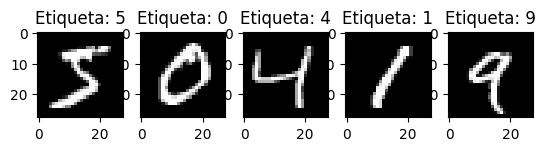

In [31]:
# COMPLETA AQUÍ: Visualización de imágenes con sus etiquetas

import matplotlib.pyplot as plt

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Etiqueta: {train_labels[i]}")



## Paso 3: Preprocesamiento (1 punto)

✏️ **Slot para completar:**
- Normaliza las imágenes (divide por 255.0).
- Aplana cada imagen a un vector de 784 valores.
- Codifica las etiquetas con `to_categorical`.


In [32]:
# COMPLETA AQUÍ: Normalización, flattening y codificación one-hot

# Normalización
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flattening
train_images_fl = train_images.reshape(-1, 784)
test_images_fl = test_images.reshape(-1, 784)

# One-hot encoding
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

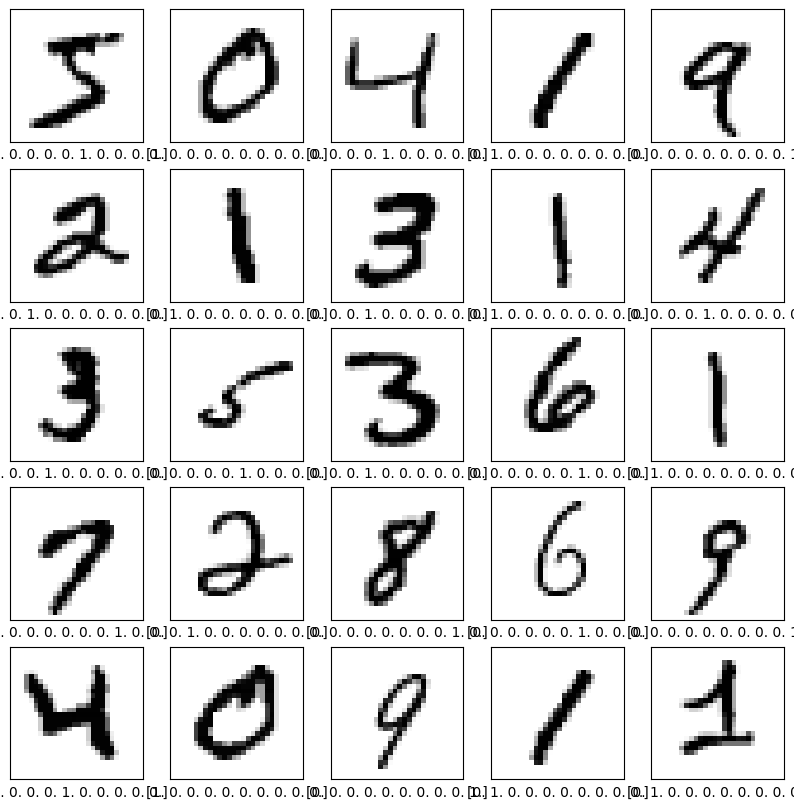

In [33]:
# Visualización de primeros 25 datos de test
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


## Paso 4: Definir la red neuronal (2 puntos)

✏️ **Slot para completar:**
- Crea un modelo `Sequential`.
- Agrega una capa oculta con activación ReLU.
- Agrega una capa de salida con activación Softmax.
- Compila el modelo con `adam` y `categorical_crossentropy`.


In [ ]:
!pip install keras


In [ ]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2630 sha256=7d119397862ef3370485ed0450f604054b0481e877368032f0fa0ec429c93ca2
  Stored in directory: /root/.cache/pip/wheels/84/04/c8/f3d21e09aa3a1e25bc4a4fc07341ca073d7372f33dbd344a06
Successfully built keras.utils


In [45]:
# COMPLETA AQUÍ: Definición y compilación del modelo
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Paso 5: Entrenar el modelo (1 punto)

✏️ **Slot para completar:** Entrena el modelo con `fit` durante 5 épocas y batch size 32.


In [47]:

# COMPLETA AQUÍ: Entrenamiento del modelo
model.fit(train_images_fl, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8756 - loss: 0.4314
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9618 - loss: 0.1252
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9752 - loss: 0.0809
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9821 - loss: 0.0599
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9868 - loss: 0.0431



## Paso 6: Evaluar el modelo (1 punto)

✏️ **Slot para completar:** Evalúa el modelo con `evaluate()` en el conjunto de prueba.


In [50]:
# COMPLETA AQUÍ: Evaluación del modelo

test_loss, test_acc = model.evaluate(test_images_fl,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.9774 - loss: 0.0762

Test accuracy: 0.977400004863739


## Preguntas de Reflexión (3 puntos en total)

### 1. ¿Qué ventaja observas al usar codificación one-hot para las etiquetas? (0.5 punto)

In [ ]:
# Tu respuesta aquí
# Permite representar variables categóricas como numéricas, lo cual facilita al modelo
# para predecir (capa de salida), ya que facilita la representación de todas las clases y una
# como la correcta.

### 2. ¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas? (0.5 punto)

In [ ]:
# Tu respuesta aquí
# Un aumento en el número de neuronas puede generar sobreajuste con los datos
# de entrada, dependiendo si la cantidad de datos no es lo suficientemente mayor
# a la cantidad de neuronas.
# Si no existe sobreajuste, este aumento puede llevar a un mejor rendimiento en la
# solución de problemas con mayor complejidad.

### 3. ¿Qué alternativa propondrías al optimizador `adam` y por qué? (0.5 punto)

In [ ]:
# Tu respuesta aquí

### 4. ¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo? (0.5 punto)

In [ ]:
# Tu respuesta aquí
# Aumenta la precisión del modelo, pero se corre el riesgo de que, al llegar a un
# número muy elevado de épocas, se realice un sobreajuste con los datos de entrada.

### 5. ¿Por qué es importante dividir en conjuntos de entrenamiento y prueba? (1 punto)

In [ ]:
# Tu respuesta aquí
# Es importante tener datos de prueba para evaluar el rendimiento del modelo entrenado con
# los datos de entrada, es vital que se divida el dataset en entrenamiento y prueba ya
# que si utilizamos muchos datos, el modelo se puede sobreajustar, además, necesitamos
# una cantidad no menor de datos para realizar una correcta evaluación del modelo.